<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/1ST_PROJECT_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
!pip install yfinance
!pip install missingno
!pip install git+https://github.com/quantopian/pyfolio
!pip install pyportfolioopt

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-j94iwcos
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-j94iwcos


In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as no
import yfinance as yf
import pyfolio as pf

In [283]:
url='https://en.wikipedia.org/wiki/NIFTY_50'
df= pd.read_html(url)

In [284]:
stocks= list(df[1].Symbol)
stocks

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'IOC',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBIN',
 'SBILIFE',
 'SHREECEM',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

In [285]:
stocks

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'IOC',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBIN',
 'SBILIFE',
 'SHREECEM',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

In [286]:
tickets=[i +'.NS' for i in stocks]

In [287]:
tickets.append('^NSEI')
tickets

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'BPCL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'IOC.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS',
 '^NSEI']

In [313]:
portfolio= yf.download(tickers=tickets,rounding=True,period='2y')['Adj Close'].dropna()
portfolio.head()

[*********************100%***********************]  51 of 51 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-18,359.14,1717.33,722.95,2920.24,9096.94,4138.68,407.76,431.55,2979.76,456.89,163.18,1716.06,2694.65,2117.73,762.90,546.61,2167.69,1256.61,568.77,2400.06,191.29,1993.72,496.90,1367.66,675.00,108.05,226.66,239.73,1626.39,1294.02,564.89,6990.60,13610.95,101.09,120.65,126.76,1435.47,997.22,322.13,19737.49,415.96,301.32,170.10,390.94,2089.28,696.17,1147.32,4093.41,535.89,247.89,11884.5
2019-11-19,357.57,1699.90,747.80,2924.08,9145.45,4119.61,437.81,429.23,2960.26,468.29,162.61,1712.85,2700.56,2144.34,779.40,543.52,2144.23,1266.42,569.02,2367.51,190.05,1975.83,492.06,1385.92,682.33,108.41,225.35,238.10,1622.99,1295.21,552.04,6938.40,13641.43,101.00,120.07,129.96,1485.20,933.90,327.38,19874.08,417.29,298.56,167.75,383.03,2046.77,706.68,1151.68,4067.42,538.09,248.83,11940.1
2019-11-20,360.17,1702.03,748.75,2925.32,9071.96,4122.40,435.76,450.44,2956.42,478.71,165.42,1743.39,2794.73,2118.95,782.87,542.64,2133.42,1267.86,573.01,2368.99,188.47,1964.92,493.55,1462.09,682.47,106.70,226.62,238.87,1598.66,1309.48,551.84,7044.07,13749.23,100.75,120.47,130.39,1522.48,937.04,325.79,20155.35,440.90,302.80,167.40,380.12,2046.53,714.32,1151.33,4081.20,539.65,247.34,11999.1
2019-11-21,365.47,1698.91,737.40,2949.33,9047.83,4107.56,424.80,425.22,2915.01,481.59,160.16,1727.03,2834.70,2164.78,772.26,544.46,2142.53,1277.82,587.52,2343.05,186.35,1986.40,496.80,1439.05,682.71,105.07,222.10,235.55,1594.46,1320.77,543.33,6912.40,13701.68,99.24,118.18,130.52,1512.60,926.97,328.32,20160.07,438.11,297.87,164.15,367.15,2055.80,708.53,1136.87,4044.70,531.79,246.00,11968.4
2019-11-22,364.83,1661.78,732.10,2916.03,9032.04,4062.38,419.17,421.33,2867.57,474.99,162.12,1713.49,2826.82,2243.52,786.39,533.99,2168.66,1259.30,584.67,2341.28,187.98,1966.72,495.35,1439.05,663.52,105.80,223.86,241.32,1568.32,1307.44,537.62,6953.17,13694.00,101.39,120.61,132.15,1521.35,939.98,326.29,20163.05,442.96,295.70,162.35,381.36,2010.76,698.39,1124.35,4048.57,520.76,241.58,11914.4


In [366]:
a=portfolio.describe().round(3)
a.iloc[1:2,]
a.loc[['min','mean','max'],:]

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
min,206.350,1485.720,303.150,1870.850,4096.260,1826.050,397.700,229.310,2028.170,372.64,98.180,1712.850,2583.350,1260.160,396.670,390.080,1453.540,764.390,341.290,1531.930,86.85,1782.440,283.170,299.820,503.910,61.190,133.100,135.140,1097.700,680.740,264.870,3950.550,12557.010,65.760,54.060,99.370,869.680,537.670,149.470,15750.080,320.230,223.550,65.300,241.93,1603.450,457.290,793.010,2994.000,248.520,161.990,7610.250
mean,502.158,2291.789,626.361,3224.332,9588.715,4668.615,538.427,372.414,3394.896,734.91,135.465,3307.852,4339.305,2270.279,1016.942,801.483,2257.032,1299.833,623.956,2713.398,264.80,2224.893,522.657,888.815,1111.307,88.811,195.118,400.879,1644.627,1240.969,653.574,6738.183,16736.399,96.561,98.251,142.105,1909.096,919.895,308.047,24184.276,564.689,545.834,219.057,685.45,2682.145,876.197,1403.889,5294.648,561.671,382.181,13257.884
max,872.490,3444.530,845.100,4151.480,19076.550,7929.300,743.500,457.160,4124.200,987.60,197.950,5372.150,5524.790,2954.210,1874.450,1347.180,3000.850,1688.700,759.000,3571.380,542.80,2795.270,841.700,1568.270,1806.140,135.410,262.550,763.250,2210.950,1959.950,960.300,8274.750,20336.840,149.650,168.100,204.650,2731.850,1261.950,529.150,31680.920,842.550,882.100,530.150,1519.40,3946.980,1618.450,2588.800,8214.050,843.290,711.550,18477.050


In [289]:
portfolio.columns
portfolio.shape

(497, 51)

In [290]:
# no.matrix(portfolio)

In [291]:
portfolio.shape

(497, 51)

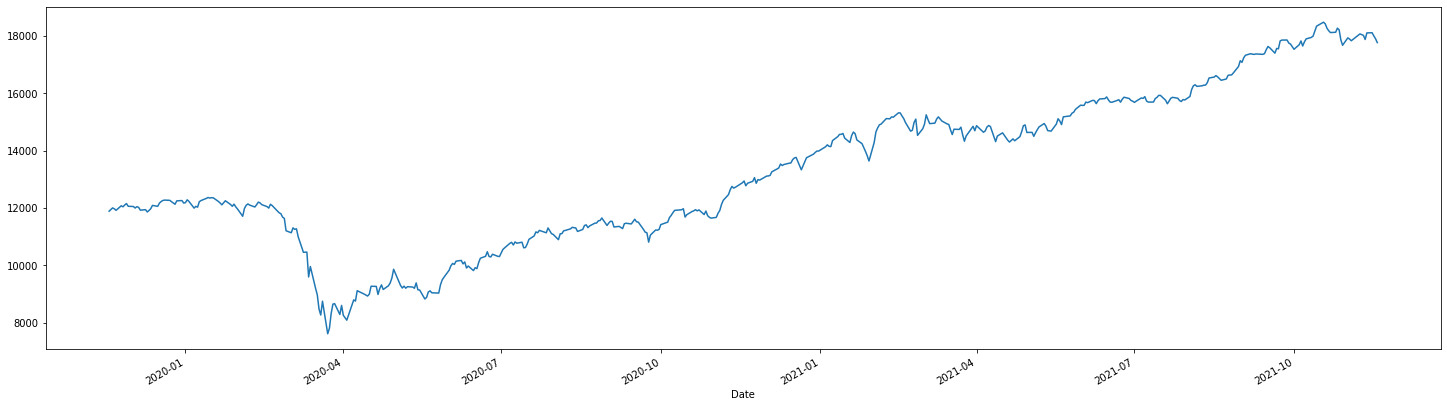

In [292]:
portfolio['^NSEI'].plot(kind='line',figsize=(25,7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


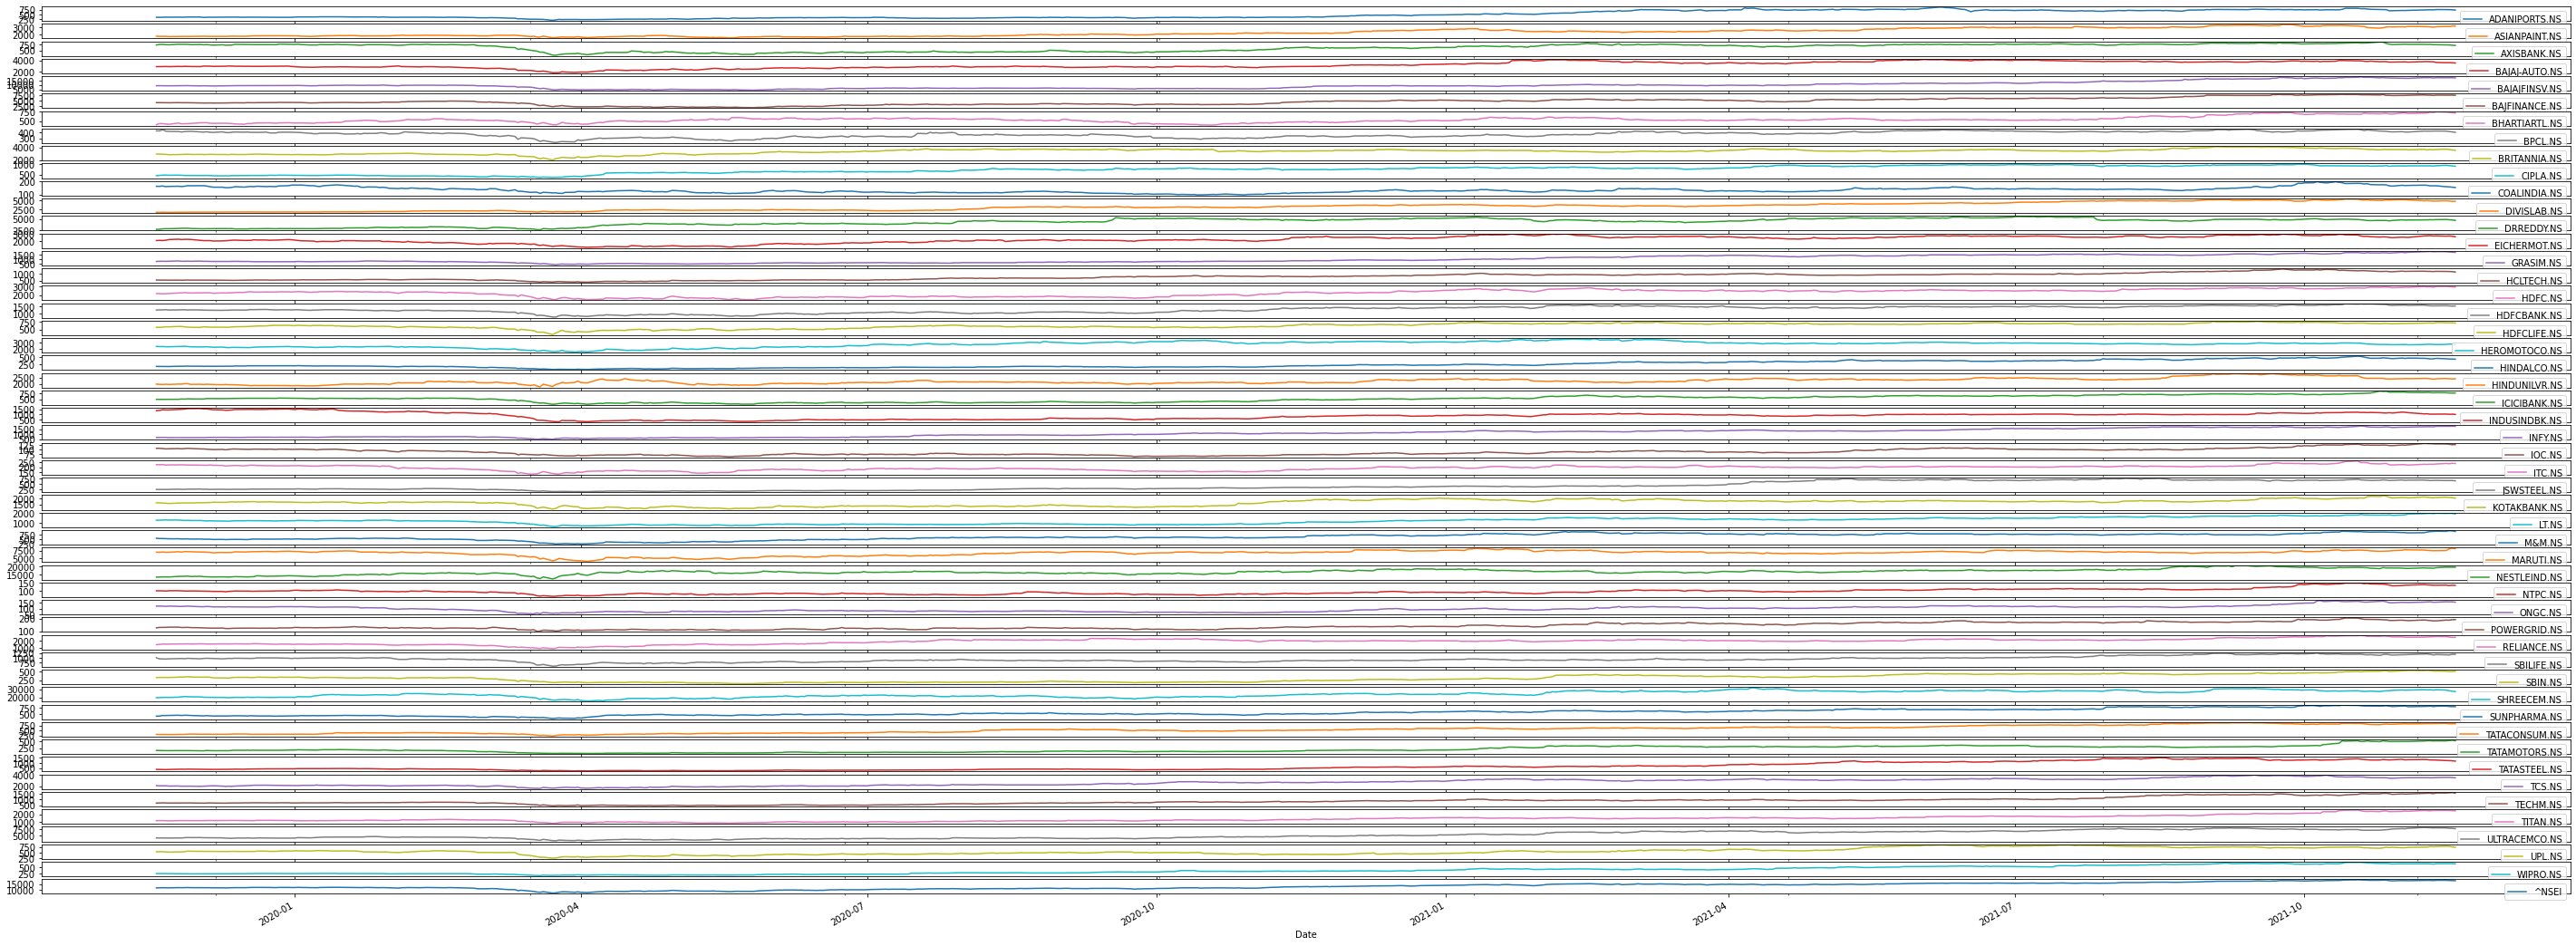

In [293]:
portfolio.plot(subplots=True,kind='line',figsize=(50,20))
plt.tight_layout(pad=20.50,h_pad=500.0)

In [294]:
 X=portfolio.iloc[:,:50]
y= portfolio['^NSEI']

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression().fit(X, y)
regr.score(X, y)
regr.coef_

array([ 2.23417128e-01,  8.96453083e-02,  6.25425529e-01,  4.54744556e-02,
        1.37798111e-02,  5.03885620e-02,  5.25143023e-01,  4.91919000e-01,
        2.52198390e-02,  8.79606486e-02, -9.77084237e-02, -1.07845423e-02,
        4.05893532e-02,  3.79728621e-02, -1.75494519e-03,  2.47782659e-01,
        4.46705578e-01,  1.01425567e+00, -5.70683911e-02,  2.89826595e-02,
        2.07331587e-01,  2.03077740e-01,  1.52566409e+00,  2.27589179e-01,
        6.82620804e-01, -5.47988517e-01,  2.61405868e+00,  2.55823410e-01,
        3.26145305e-01,  3.69169371e-01,  1.98871862e-01,  4.32800593e-02,
        6.83172761e-03,  1.47100255e+00,  2.19303124e+00,  4.08362273e-01,
        7.47416046e-01,  1.83112716e-01,  6.87294829e-01,  7.84017409e-03,
        2.11373810e-01,  7.85697468e-03,  4.10688617e-01,  2.36133266e-01,
        2.87011957e-01,  2.06472211e-01,  7.18697149e-02,  2.21946194e-02,
        1.54269034e-01,  3.01820139e-01])

In [295]:
list1=list(x.columns)
list2= list(regr.coef_.round(2))
results_regression= pd.DataFrame(list(zip(list1,list2)))
results_regression.columns=['Stocks','coeff'] 

In [296]:
portfolio_companies= results_regression[(results_regression['coeff']>=.55)].Stocks
portfolio_companies

2      AXISBANK.NS
17     HDFCBANK.NS
22    ICICIBANK.NS
24         INFY.NS
26          ITC.NS
33         NTPC.NS
34         ONGC.NS
36     RELIANCE.NS
38         SBIN.NS
Name: Stocks, dtype: object

In [297]:
portfolio.to_csv('portfolios.csv')
from google.colab import files
files.download("portfolios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [298]:
# from google.colab import drive
# drive.mount('drive')

# df.to_csv('/content/drive/My Drive/filename.csv', encoding='utf-8', index=False)

#**PORTFOLIO OPTIMISATION**


---



In [335]:
lt= list(portfolio_companies)
lt.append('^NSEI')
lt

file= yf.download(tickers=lt,rounding=True,period='2y')['Adj Close'].dropna()
file.head()

[*********************100%***********************]  10 of 10 completed


,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,NTPC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,^NSEI
Date,,,,,,,,,,
2019-11-18,722.95,1256.61,496.90,675.00,226.66,101.09,120.65,1435.47,322.13,11884.5
2019-11-19,747.80,1266.42,492.06,682.33,225.35,101.00,120.07,1485.20,327.38,11940.1
2019-11-20,748.75,1267.86,493.55,682.47,226.62,100.75,120.47,1522.48,325.79,11999.1
2019-11-21,737.40,1277.82,496.80,682.71,222.10,99.24,118.18,1512.60,328.32,11968.4
2019-11-22,732.10,1259.30,495.35,663.52,223.86,101.39,120.61,1521.35,326.29,11914.4


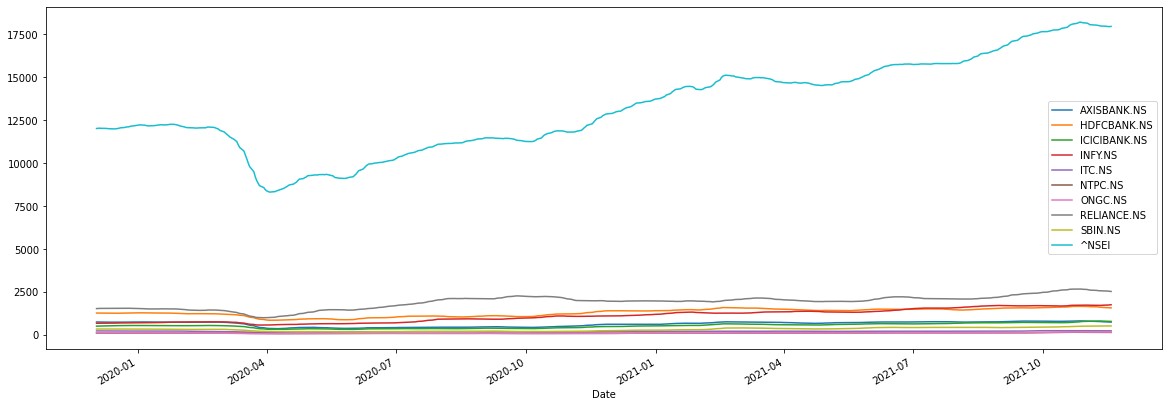

In [338]:
fig1=file.rolling(window=12).mean().plot(figsize=(20,7))

In [369]:
file.describe().round(3).loc[['min','mean','max'],:]

,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,NTPC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,^NSEI
min,303.150,764.390,283.170,503.910,133.100,65.760,54.060,869.680,149.470,7610.250
mean,626.361,1299.833,522.657,1111.307,195.118,96.561,98.251,1909.096,308.047,13257.884
max,845.100,1688.700,841.700,1806.140,262.550,149.650,168.100,2731.850,529.150,18477.050


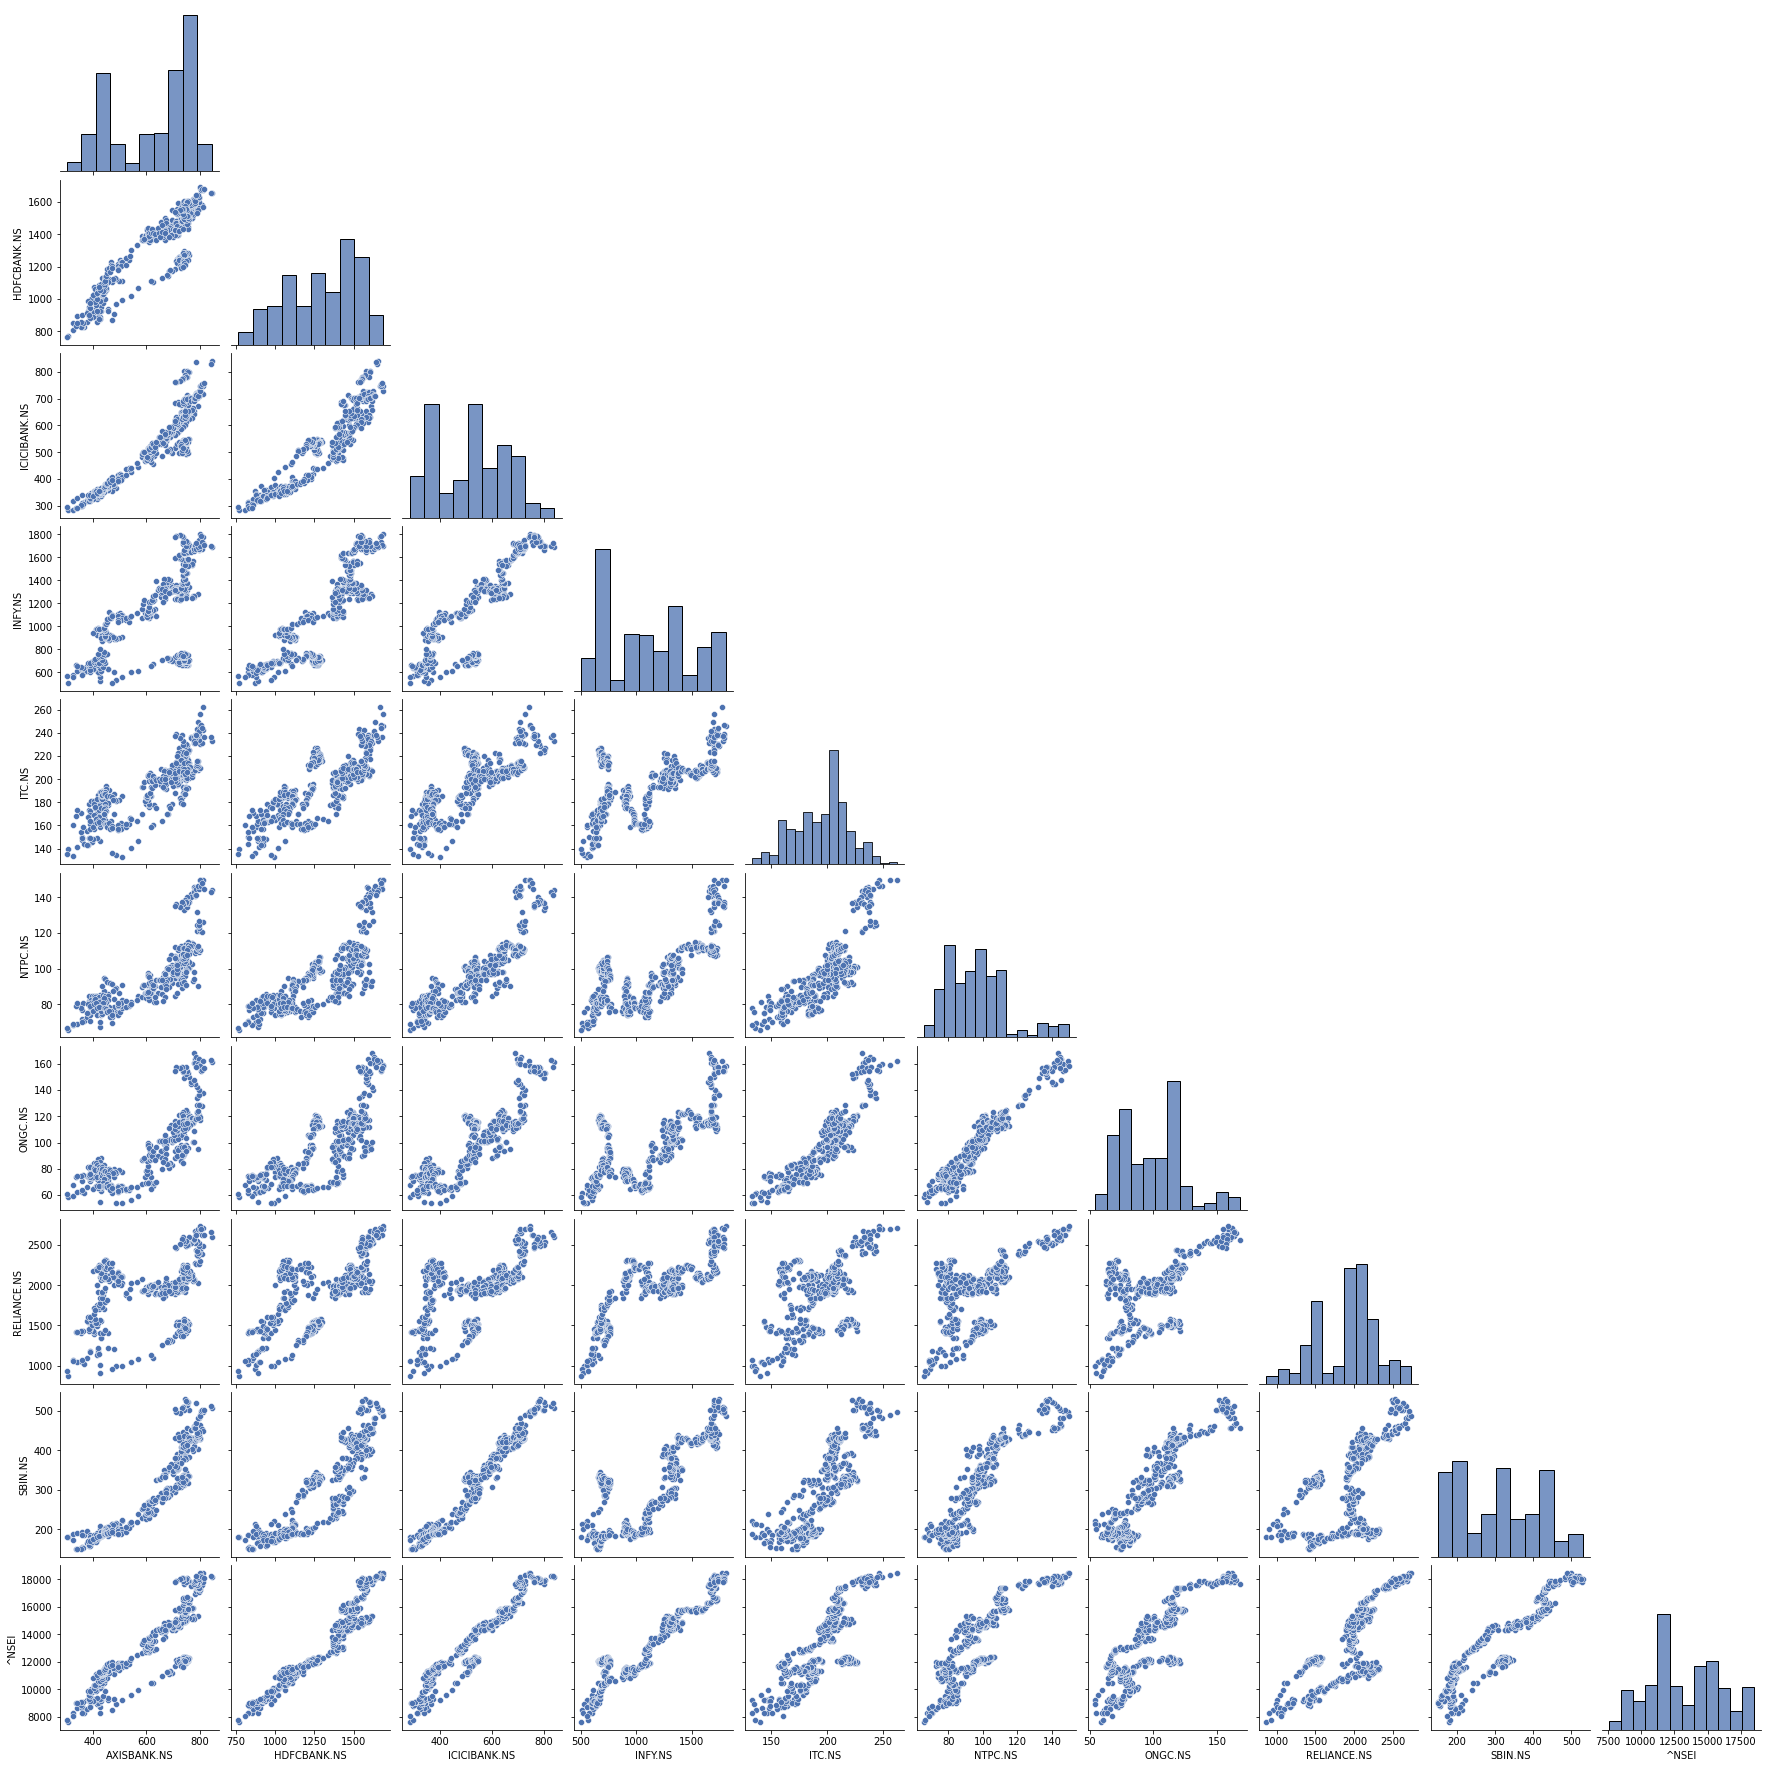

In [393]:
sns.pairplot(file,corner=True,diag_kind='hist')

In [370]:
import pypfopt
from pypfopt import risk_models, expected_returns, plotting

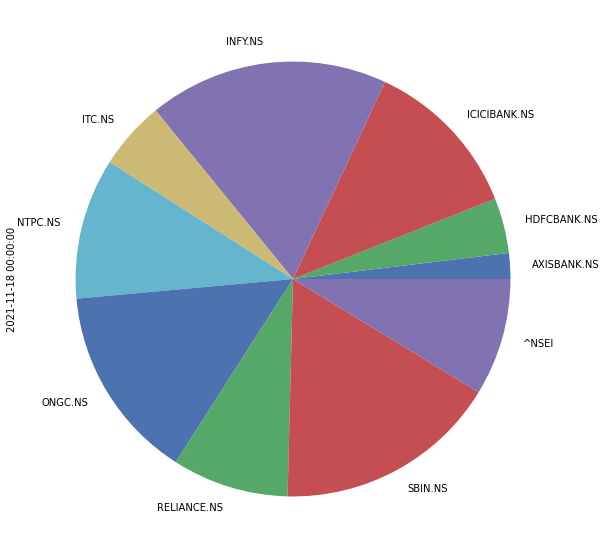

In [415]:
from pypfopt import  expected_returns
mu= pypfopt.expected_returns.ema_historical_return(file, log_returns=True)
mu.plot(kind='pie',figsize=(10,10))


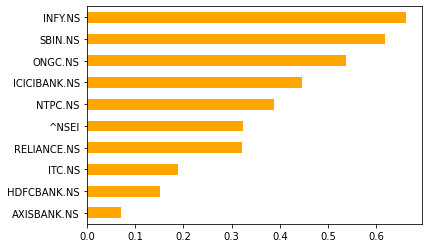

In [416]:
pd.Series(mu).sort_values().plot(kind='barh',color='orange')

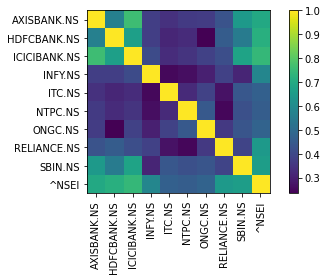

In [386]:
cov = risk_models.sample_cov(pd.DataFrame(file))
S = risk_models.CovarianceShrinkage(file).ledoit_wolf().round(3) #Thus we calculate  Shrinked Covaraince
plotting.plot_covariance(S, plot_correlation=True);

In [413]:
S

,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,NTPC.NS,ONGC.NS,RELIANCE.NS,SBIN.NS,^NSEI
AXISBANK.NS,0.239,0.094,0.161,0.059,0.056,0.059,0.082,0.079,0.131,0.087
HDFCBANK.NS,0.094,0.115,0.098,0.041,0.036,0.037,0.036,0.058,0.078,0.062
ICICIBANK.NS,0.161,0.098,0.187,0.057,0.048,0.050,0.075,0.068,0.122,0.082
INFY.NS,0.059,0.041,0.057,0.103,0.027,0.028,0.044,0.046,0.042,0.048
ITC.NS,0.056,0.036,0.048,0.027,0.111,0.036,0.058,0.034,0.061,0.040
NTPC.NS,0.059,0.037,0.050,0.028,0.036,0.110,0.067,0.031,0.058,0.039
ONGC.NS,0.082,0.036,0.075,0.044,0.058,0.067,0.204,0.061,0.082,0.055
RELIANCE.NS,0.079,0.058,0.068,0.046,0.034,0.031,0.061,0.140,0.061,0.062
SBIN.NS,0.131,0.078,0.122,0.042,0.061,0.058,0.082,0.061,0.172,0.070
^NSEI,0.087,0.062,0.082,0.048,0.040,0.039,0.055,0.062,0.070,0.065
